In [65]:
import matplotlib.pyplot as plt                  
import pandas as pd
import numpy as np

In [88]:
# map source
map_source = 'Colin'
# ksz type
ksz_type = 'lt'

In [89]:
data_path = 'data/'
plot_path = 'plots/' 
plot_name =f'{map_source}_{ksz_type}_auto_bias.png'
lmax1, lmax2, lmax3 = 3000, 4000, 4500
ylim = [-0.05, 0.05]

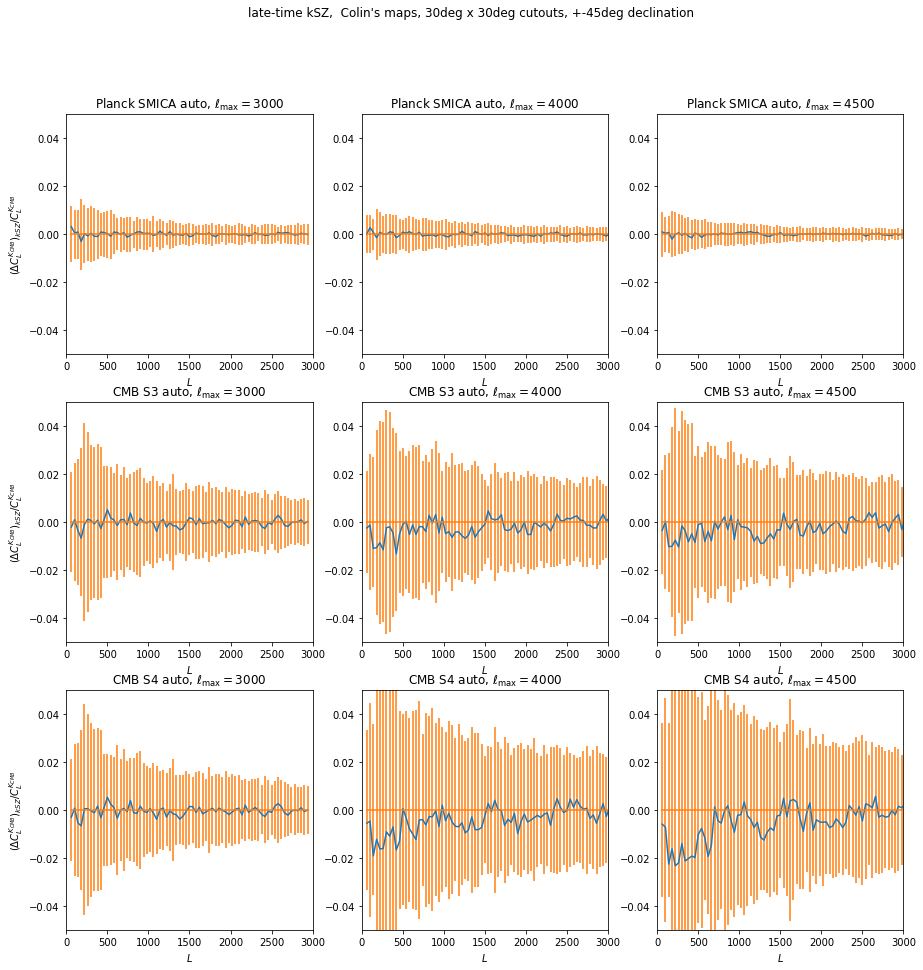

In [90]:
fig_auto, ax_auto = plt.subplots(3,3,figsize=(15,15))
if ksz_type == 'lt':
    fig_auto.suptitle(f'late-time kSZ,  {map_source}\'s maps, 30deg x 30deg cutouts, +-45deg declination')
elif ksz_type == 'ri':
    fig_auto.suptitle(f'reionization kSZ, {map_source}\'s maps, 30deg x 30deg cutouts, +-45deg declination')

auto_00 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_Planck_SMICA_100_{lmax1}.csv')
auto_01 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_Planck_SMICA_100_{lmax2}.csv')
auto_02 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_Planck_SMICA_100_{lmax3}.csv')
auto_10 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S3_100_{lmax1}.csv')
auto_11 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S3_100_{lmax2}.csv')
auto_12 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S3_100_{lmax3}.csv')
auto_20 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S4_100_{lmax1}.csv')
auto_21 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S4_100_{lmax2}.csv')
auto_22 = pd.read_csv(data_path + f'{map_source}_{ksz_type}_auto_CMB_S4_100_{lmax3}.csv')

ax_auto[0,0].plot(auto_00['L'], auto_00['auto_bias'])
ax_auto[0,0].errorbar(auto_00['L'], np.zeros(np.shape(auto_00['L'])), yerr=auto_00['auto_bias_err'])
ax_auto[0,0].set_title(r'Planck SMICA auto, ${\ell}_{\mathrm{max}}=%s$' %lmax1)
ax_auto[0,0].set_xlabel('$L$')                                                                        
ax_auto[0,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[0,0].set_xlim([0,3000])
ax_auto[0,0].set_ylim(ylim)


ax_auto[0,1].plot(auto_01['L'], auto_01['auto_bias'])
ax_auto[0,1].errorbar(auto_01['L'], np.zeros(np.shape(auto_01['L'])), yerr=auto_01['auto_bias_err'])
ax_auto[0,1].set_title(r'Planck SMICA auto, ${\ell}_{\mathrm{max}}=%s$' %lmax2)
ax_auto[0,1].set_xlabel('$L$')                                                                        
#ax_auto[0,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[0,1].set_xlim([0,3000])
ax_auto[0,1].set_ylim(ylim)

ax_auto[0,2].plot(auto_02['L'], auto_02['auto_bias'])
ax_auto[0,2].errorbar(auto_02['L'], np.zeros(np.shape(auto_02['L'])), yerr=auto_02['auto_bias_err'])
ax_auto[0,2].set_title(r'Planck SMICA auto, ${\ell}_{\mathrm{max}}=%s$' %lmax3)
ax_auto[0,2].set_xlabel('$L$')                                                                        
#ax_auto[0,2].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[0,2].set_xlim([0,3000])
ax_auto[0,2].set_ylim(ylim)


ax_auto[1,0].plot(auto_10['L'], auto_10['auto_bias'])
ax_auto[1,0].errorbar(auto_10['L'], np.zeros(np.shape(auto_10['L'])), yerr=auto_10['auto_bias_err'])
ax_auto[1,0].set_title(r'CMB S3 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax1)
ax_auto[1,0].set_xlabel('$L$')                                                                        
ax_auto[1,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[1,0].set_xlim([0,3000])
ax_auto[1,0].set_ylim(ylim)


ax_auto[1,1].plot(auto_11['L'], auto_11['auto_bias'])
ax_auto[1,1].errorbar(auto_11['L'], np.zeros(np.shape(auto_11['L'])), yerr=auto_11['auto_bias_err'])
ax_auto[1,1].set_title(r'CMB S3 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax2)
ax_auto[1,1].set_xlabel('$L$')                                                                        
#ax_auto[1,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[1,1].set_xlim([0,3000])
ax_auto[1,1].set_ylim(ylim)

ax_auto[1,2].plot(auto_12['L'], auto_12['auto_bias'])
ax_auto[1,2].errorbar(auto_12['L'], np.zeros(np.shape(auto_12['L'])), yerr=auto_12['auto_bias_err'])
ax_auto[1,2].set_title(r'CMB S3 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax3)
ax_auto[1,2].set_xlabel('$L$')                                                                        
#ax_auto[1,2].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[1,2].set_xlim([0,3000])
ax_auto[1,2].set_ylim(ylim)



ax_auto[2,0].plot(auto_20['L'], auto_20['auto_bias'])
ax_auto[2,0].errorbar(auto_20['L'], np.zeros(np.shape(auto_20['L'])), yerr=auto_20['auto_bias_err'])
ax_auto[2,0].set_title(r'CMB S4 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax1)
ax_auto[2,0].set_xlabel('$L$')                                                                        
ax_auto[2,0].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[2,0].set_xlim([0,3000])
ax_auto[2,0].set_ylim(ylim)


ax_auto[2,1].plot(auto_21['L'], auto_21['auto_bias'])
ax_auto[2,1].errorbar(auto_21['L'], np.zeros(np.shape(auto_21['L'])), yerr=auto_21['auto_bias_err'])
ax_auto[2,1].set_title(r'CMB S4 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax2)
ax_auto[2,1].set_xlabel('$L$')                                                                        
#ax_auto[2,1].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[2,1].set_xlim([0,3000])
ax_auto[2,1].set_ylim(ylim)

ax_auto[2,2].plot(auto_22['L'], auto_22['auto_bias'])
ax_auto[2,2].errorbar(auto_22['L'], np.zeros(np.shape(auto_22['L'])), yerr=auto_22['auto_bias_err'])
ax_auto[2,2].set_title(r'CMB S4 auto, ${\ell}_{\mathrm{max}}=%s$' %lmax3)
ax_auto[2,2].set_xlabel('$L$')                                                                        
#ax_auto[2,2].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
ax_auto[2,2].set_xlim([0,3000])
ax_auto[2,2].set_ylim(ylim)


plt.savefig(plot_path + plot_name)